# Plot Results WebXR from Experiment
Author: Khushi Bhansali

This code is designed to analyze and visualize contrast sensitivity data from multiple experiments. Its main functions are:

*   Data Processing: It processes multiple JSON files containing experimental results on contrast sensitivity.
*   Data Aggregation: The code combines data from all input files and calculates average contrast sensitivity for each spatial frequency and position combination.
*  Visualization: It generates a set of plots (up to 9) showing the Contrast Sensitivity Function (CSF) for different positions in the visual field.

**How to use this code effectively:**
Set the Folder Path: Replace the folder_path (or file_path depending on if you just want to plot results from 1 file) variable with the path to your folder containing the JSON files from your experiments.


`folder_path = '/path/to/your/folder'`

`file_path = '/path/to/your/folder'`

**Run the Script:** Execute the script after setting the correct folder path.


**Interpret the Results:** The script will generate a figure with up to 9 subplots, each representing a different position in the visual field. These plots show how contrast sensitivity changes with spatial frequency for each position.

**What the Plots Show**
X-axis: Spatial Frequency (cycles/degree)
Y-axis: Contrast Sensitivity Function (CSF) on a logarithmic scale
Each plot represents a different position in the visual field
The line in each plot shows the average contrast sensitivity across all processed files for that position
This tool is valuable for researchers and clinicians studying visual perception, as it provides a comprehensive view of how contrast sensitivity varies across different spatial frequencies and positions in the visual field, aggregated from multiple experimental results.

---

**Run this cell to import files or folders from Google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Run this cell to import nessecary dependencies for python code below**


In [ ]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Run this cell to plot contrast sensitivity graph over single or multiple positions using a single JSON file


<ipython-input-17-50479df3d9fe>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['position'] = df_combined["position"].map(str)
<ipython-input-17-50479df3d9fe>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['frequency'] = df_combined['frequency'].map(float)
<ipython-input-17-50479df3d9fe>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

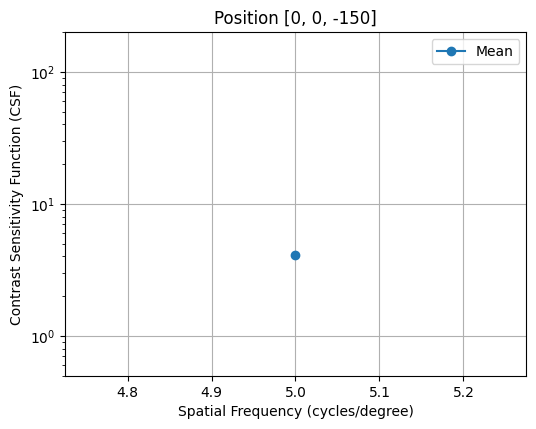

In [17]:
# Replace with your file path
file_path =  '/content/NaN-1726250823761.json'

def openFile(path):
    with open(path,'r') as f:
        return json.loads(f.read())

file_data = openFile(file_path)
df_nested_list = pd.json_normalize(file_data, record_path =['responses'])

def reorder(df_nested_list):
    df_nested_list = df_nested_list[1:]
    n = len(df_nested_list)
    for index, row in df_nested_list.iterrows():
        if (index-1)%9 == 0 and index+4 < n:
            center = df_nested_list.loc[index].values
            df_nested_list.loc[index] = df_nested_list.loc[index+1].values
            df_nested_list.loc[index+1] = df_nested_list.loc[index+2].values
            df_nested_list.loc[index+2] = df_nested_list.loc[index+3].values
            df_nested_list.loc[index+3] = df_nested_list.loc[index+4].values
            df_nested_list.loc[index+4] = center
    return df_nested_list

df_nested_list = reorder(df_nested_list)

df_combined = df_nested_list[["frequency", "position", "contrast"]]
df_combined['position'] = df_combined["position"].map(str)
df_combined['frequency'] = df_combined['frequency'].map(float)
df_combined['contrast'] = df_combined['contrast'].map(float)

df_combined.loc[:, 'contrast'] = 1 / df_combined['contrast']

df_combined = df_combined.copy()

# Convert position to string for easier handling in plots
df_combined['position'] = df_combined['position'].astype(str)

# Number of unique positions
positions = df_combined['position'].unique()

# Set up the plotting area to have 9 subplots (3x3 grid)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create a plot for each position
for i, position in enumerate(positions):
    ax = axes[i]
    subset = df_combined[df_combined['position'] == position]

    # Group by frequency and calculate mean, std, and standard error
    stats = subset.groupby('frequency')['contrast'].agg(['mean', 'std', 'count'])
    stats['stderr'] = stats['std'] / np.sqrt(stats['count'])

    if not stats.empty and not stats['std'].isnull().all():
        # Plot with error bars for standard deviation and standard error
        ax.errorbar(stats.index, stats['mean'], yerr=stats['std'], fmt='o-', label='Mean ± Std Dev')
        ax.errorbar(stats.index, stats['mean'], yerr=stats['stderr'], fmt='o-', label='Mean ± Std Error', linestyle='--', color='gray')
    else:
        # Plot without error bars if standard deviation is empty or all NaN
        ax.plot(stats.index, stats['mean'], 'o-', label='Mean')

    ax.set_xlabel('Spatial Frequency (cycles/degree)')
    ax.set_ylabel('Contrast Sensitivity Function (CSF)')
    ax.set_yscale('log')
    ax.set_ylim(0.5, 200)
    ax.set_title(f'Position {position}')
    ax.grid(True)
    ax.legend()

# Remove any unused subplots
for j in range(i+1, 9):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

# Run this cell to plot contrast sensitivity graph over single or multiple positions using a folder of JSON result files

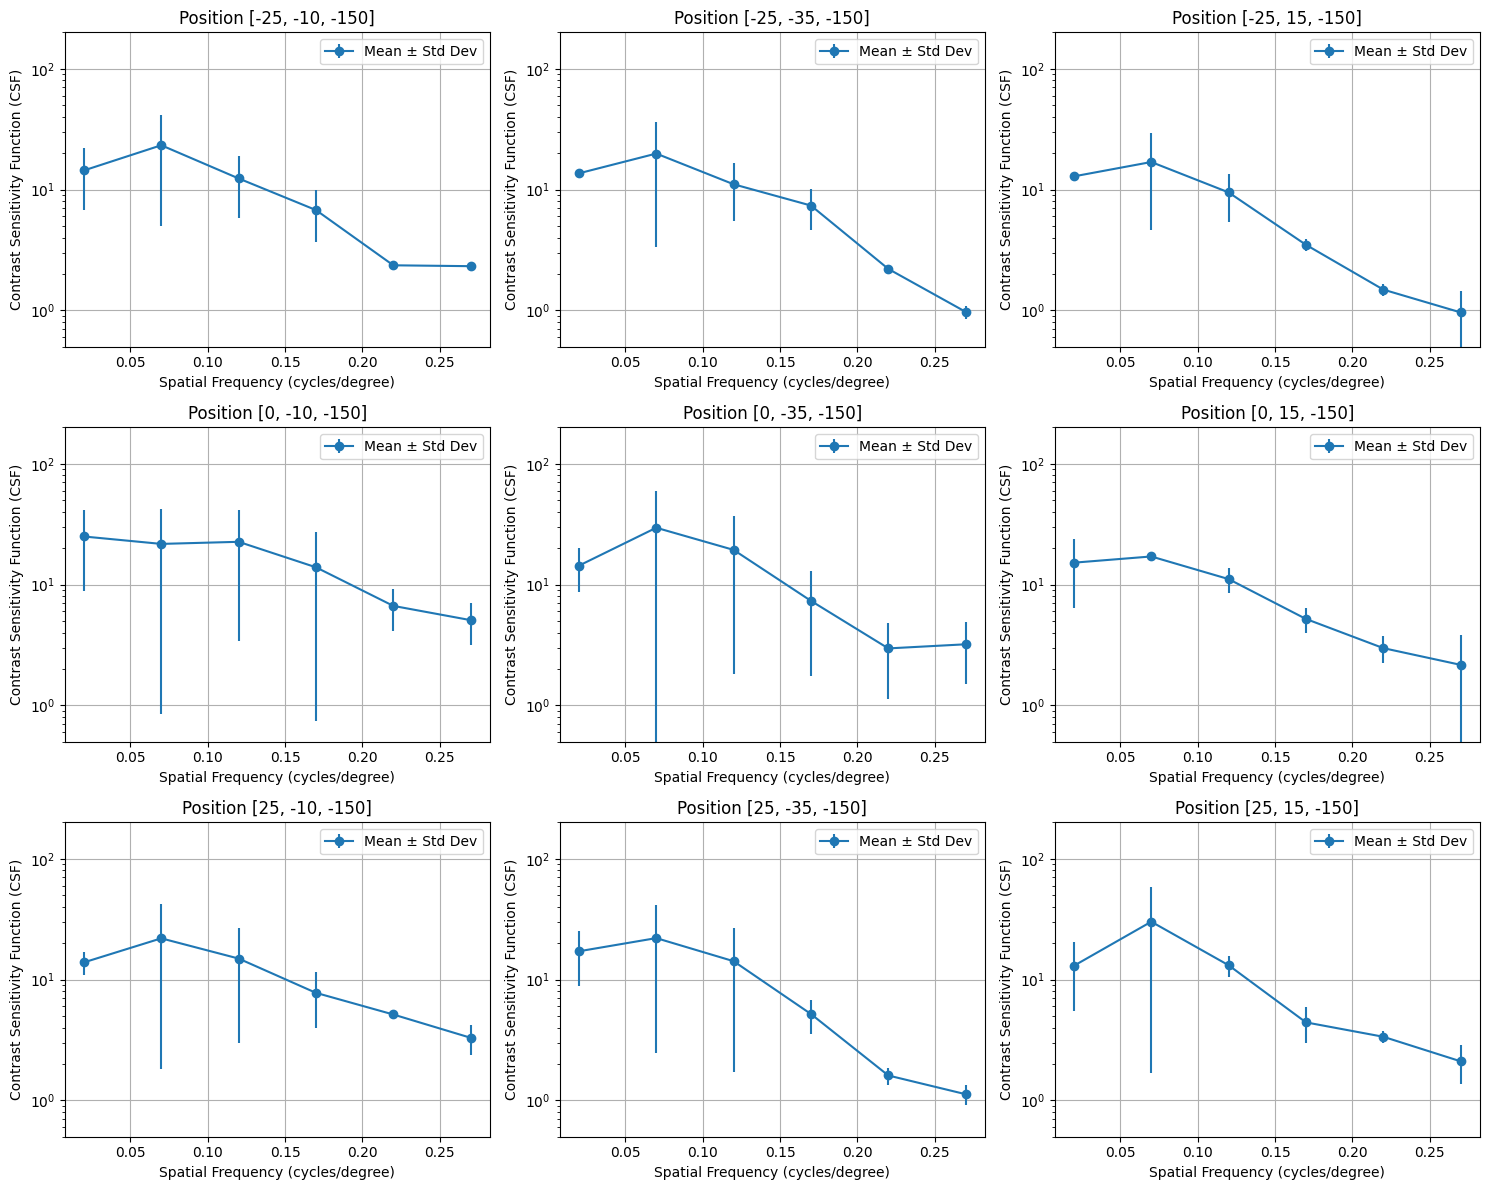

In [24]:
#reads files from folder
def openFile(path):
    with open(path, 'r') as f:
        return json.loads(f.read())

def reorder(df_nested_list):
    df_nested_list = df_nested_list[1:]
    n = len(df_nested_list)
    for index, row in df_nested_list.iterrows():
        if (index-1)%9 == 0 and index+4 < n:
            center = df_nested_list.loc[index].values
            df_nested_list.loc[index] = df_nested_list.loc[index+1].values
            df_nested_list.loc[index+1] = df_nested_list.loc[index+2].values
            df_nested_list.loc[index+2] = df_nested_list.loc[index+3].values
            df_nested_list.loc[index+3] = df_nested_list.loc[index+4].values
            df_nested_list.loc[index+4] = center
    return df_nested_list

# Specify the folder path containing the JSON files
folder_path = '/content/BothEyes'

# Initialize an empty list to store dataframes from each file
all_dfs = []

# Iterate through all JSON files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)

        # Open and process each file
        data = openFile(file_path)
        df_nested_list = pd.json_normalize(data, record_path=['responses'])
        df_nested_list = reorder(df_nested_list)

        df_combined = df_nested_list[["frequency", "position", "contrast"]].copy()
        df_combined.loc[:, 'position'] = df_combined["position"].map(str)
        df_combined.loc[:, 'frequency'] = df_combined['frequency'].map(float)
        df_combined.loc[:, 'contrast'] = df_combined['contrast'].map(float)
        df_combined.loc[:, 'contrast'] = 1 / df_combined['contrast']

        all_dfs.append(df_combined)

# Concatenate all dataframes
df_combined = pd.concat(all_dfs, ignore_index=True)

# Group by position and frequency, then calculate the mean contrast
df_averaged = df_combined.groupby(['position', 'frequency'])['contrast'].mean().reset_index()

df_stats = df_combined.groupby(['position', 'frequency']).agg(
    contrast_mean=('contrast', 'mean'),
    contrast_std=('contrast', 'std')
).reset_index()

# Number of unique positions
positions = df_stats['position'].unique()

# Set up the plotting area to have 9 subplots (3x3 grid)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create a plot for each position
for i, position in enumerate(positions):
    ax = axes[i]
    subset = df_stats[df_stats['position'] == position]

    # Plot the mean contrast with error bars (standard deviation)
    ax.errorbar(subset['frequency'], subset['contrast_mean'],
                yerr=subset['contrast_std'], fmt='o-', label='Mean ± Std Dev')

    ax.set_xlabel('Spatial Frequency (cycles/degree)')
    ax.set_ylabel('Contrast Sensitivity Function (CSF)')
    ax.set_yscale('log')
    ax.set_ylim(0.5, 200)
    ax.set_title(f'Position {position}')
    ax.grid(True)
    ax.legend()

# Remove any unused subplots
for j in range(i+1, 9):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()